# HW1 - An Evaluation of Sentiment Classification Tools

Background:
 
Artificial Intelligence (AI) has become a popular topic recently. Assume that you are a consultant at a public relations firm, and a client of your firm would like you to evaluate the current public sentiment toward AI in social media like Facebook and Twitter.

Since there are too many comments on social media, you can't manually collect and analyze them all. Fortunately you have discovered some free sentiment analysis tools, and now need to evaluate whether they are good enough to do sentiment analysis for your assigned task.

Goals:

1) You need to collect a sample data set and

2) choose two (2) tools to compare their effectiveness in sentiment analysis.

3) Write a report – USE MY REQUIRED FORMAT

* Include in the correct sections the following (and more)
    1. to describe (1) your sampling strategy  - how did you get/create data?
    2. and whether it would result in a representative sample of public sentiment toward AI,
    3. (2) data preparation – how did you prepare your data for analysis – did you clean it? Did you format it? What are the variables? What do the variables represent? Is it labeled data?
    4. and system evaluation process – this means that you should explain the methods you chose and what you did with them. DO NOT INCLUDE CODE in your papers. All code is submitted as .py.
    5.  and (3) your conclusion on whether these tools are suitable for your task.  – here, because the required FORMAT has Results and Conclusions sections – read about what these mean and think about how to meet the requirements of each given the specifications of this assignment.
    
* A few examples of tools:
    1. NLTK’s built-in sentiment analysis tools. See sample code in http://www.nltk.org/howto/sentiment.html
    2. VADER https://github.com/cjhutto/vaderSentiment

### Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('colheader_justify', 'center')

In [2]:
#url='https://raw.githubusercontent.com/bing020815/Syracuse-University/master/IST%20736/HW1/data/tweets.csv'
url='https://raw.githubusercontent.com/bing020815/Syracuse-University/master/IST-736/HW1/data/AI.csv'
tweets = pd.read_csv(url)

In [3]:
#AI = pd.read_csv('AI.csv')

In [4]:
#tweets = pd.read_csv('tweets.csv', encoding='utf-8', quotechar='"')

In [5]:
tweets['Tweets']=tweets.Tweets.map(str.strip)
tweets=tweets.set_index('Item')

In [6]:
tweets.head()

,Sentiment,Tweets
Item,,
1,0,"in case anyone was wondering how quarantine is going, here’s a real thought i had today: “i’m not scared of artificial intelligence; i’m scared of my puns becoming sentient”"
2,0,#ExMachina this movie blows my mind artificial intelligence can be exciting but at the same time detrimental when it comes to how powerful they can become. This movie definitely makes you think about what if. Crazy
3,1,"""representatives from Youtube mentioned that artificial Intelligence was involved in the incident and that they have pressured senior staff. A spokesperson from Google, Youtube’s parent company,"
4,1,Don't be fooled to believe quarantine helps. Countries will go bankrupt and then China will eat Europe like a toast. All fucked countries will be ruled by market liberalistic totalitarianism and artificial intelligence. You havent even grasped what's at stake. Act soon.
5,1,"Since were already doing a lot of stuff remotely, what if #COVID19 is the start of the completely futuristic era we’ve all imagined of where technology rules and artificial intelligence/robots do everything for us."


In [7]:
tweets.head().style.set_properties(subset=['Tweets'],
                                   **{'text-align': 'left'}).set_table_styles([ dict(selector='th', 
                                                                                     props=[('text-align', 'left')] ) ])

,Sentiment,Tweets
Item,,
1,0,"in case anyone was wondering how quarantine is going, here’s a real thought i had today: “i’m not scared of artificial intelligence; i’m scared of my puns becoming sentient”"
2,0,#ExMachina this movie blows my mind artificial intelligence can be exciting but at the same time detrimental when it comes to how powerful they can become. This movie definitely makes you think about what if. Crazy
3,1,"""representatives from Youtube mentioned that artificial Intelligence was involved in the incident and that they have pressured senior staff. A spokesperson from Google, Youtube’s parent company,"
4,1,Don't be fooled to believe quarantine helps. Countries will go bankrupt and then China will eat Europe like a toast. All fucked countries will be ruled by market liberalistic totalitarianism and artificial intelligence. You havent even grasped what's at stake. Act soon.
5,1,"Since were already doing a lot of stuff remotely, what if #COVID19 is the start of the completely futuristic era we’ve all imagined of where technology rules and artificial intelligence/robots do everything for us."


### Sentiment Analysis

#### #NLTK

In [8]:
def NLTK_sentiment(docs_list):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()
    score=list()
    sentiment=[]
    for d in docs_list:
        s = sid.polarity_scores(d)['compound']
        score.append(s)
        if s > 0.05:
            sentiment.append('pos')
        else:
            if s < -0.05:
                sentiment.append('neg')
            else:
                sentiment.append('neu')
    return score, sentiment

In [9]:
tweets['NLTK_score'] = NLTK_sentiment(tweets.Tweets)[0]
tweets['NLTK_sentiment'] = NLTK_sentiment(tweets.Tweets)[1]

In [10]:
tweets.NLTK_sentiment.value_counts()

pos    40
neg    14
neu     6
Name: NLTK_sentiment, dtype: int64

#### #VADER

In [11]:
# pip install vaderSentiment

In [12]:
def VADER_sentiment(docs_list):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    score=list()
    sentiment=[]
    for d in docs_list:
        s = analyzer.polarity_scores(d)['compound']
        score.append(s)
        if s > 0.05:
            sentiment.append('pos')
        else:
            if s < -0.05:
                sentiment.append('neg')
            else:
                sentiment.append('neu')
    return score, sentiment

In [13]:
tweets['VADER_score'] = VADER_sentiment(tweets.Tweets)[0]
tweets['VADER_sentiment'] = VADER_sentiment(tweets.Tweets)[1]

### Comparison

In [14]:
tweets.head()

,Sentiment,Tweets,NLTK_score,NLTK_sentiment,VADER_score,VADER_sentiment
Item,,,,,,
1,0,"in case anyone was wondering how quarantine is going, here’s a real thought i had today: “i’m not scared of artificial intelligence; i’m scared of my puns becoming sentient”",0.7853,pos,0.3830,pos
2,0,#ExMachina this movie blows my mind artificial intelligence can be exciting but at the same time detrimental when it comes to how powerful they can become. This movie definitely makes you think about what if. Crazy,0.8074,pos,0.8074,pos
3,1,"""representatives from Youtube mentioned that artificial Intelligence was involved in the incident and that they have pressured senior staff. A spokesperson from Google, Youtube’s parent company,",0.2960,pos,0.2960,pos
4,1,Don't be fooled to believe quarantine helps. Countries will go bankrupt and then China will eat Europe like a toast. All fucked countries will be ruled by market liberalistic totalitarianism and artificial intelligence. You havent even grasped what's at stake. Act soon.,-0.5132,neg,-0.5132,neg
5,1,"Since were already doing a lot of stuff remotely, what if #COVID19 is the start of the completely futuristic era we’ve all imagined of where technology rules and artificial intelligence/robots do everything for us.",0.0000,neu,0.0000,neu


In [15]:
# Create new feature, 'match', for NLTK sentiment and VADER sentiment
tweets.loc[(tweets['NLTK_sentiment'] == tweets['VADER_sentiment']), 'match'] = 1
tweets.loc[(tweets['NLTK_sentiment'] != tweets['VADER_sentiment']), 'match'] = 0

In [16]:
# Not matching tweets
tweets[tweets.match==0].style.set_properties(subset=['Tweets','NLTK_sentiment','VADER_sentiment'],
                                   **{'text-align': 'left'}).set_table_styles([ dict(selector='th', 
                                                                                     props=[('text-align', 
                                                                                             'left')] ) ]).hide_index()

Sentiment,Tweets,NLTK_score,NLTK_sentiment,VADER_score,VADER_sentiment,match
1,"Life is eternal in HELL, Mind Controlling itself or Artificial Intelligence the Machine that always wins the Game through Artificial means in an artificial world. The replications have no chance to beat the Master of the World/Satan/AI.",0.068800,pos,-0.070300,neg,0.000000
0,5G is about the internet of things and artificial intelligence... and billions $ in an emerging market driven by those things. It's not about us or our health/safety. #nwo,0.000000,neu,0.476700,pos,0.000000
1,"Artificial Intelligence is used to advance and solve most complicated issues for and against humankind. So, can artificial intelligence help stop and kill the conronavirus attacking human existence?",0.016400,neu,-0.051600,neg,0.000000


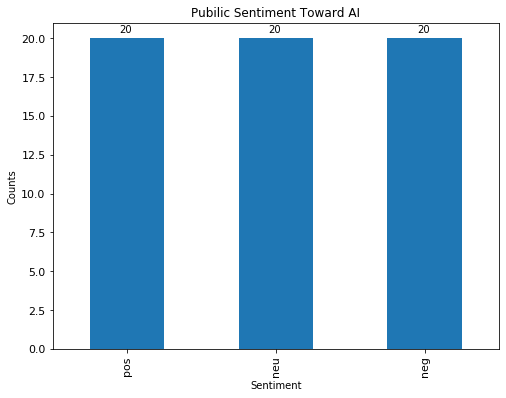

In [17]:
# Collector's Sentiment as Public Sentiment toward AI
tweets['Sentiment']=tweets.Sentiment.map({-1:'neg', 0:'neu', 1:'pos'}) # mask with the strings

tweets.Sentiment.value_counts().plot(kind='bar', figsize=(8,6), fontsize=11,);
plt.title('Pubilic Sentiment Toward AI', size=12)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
# add annotation on each bar
for i in range(3):
    plt.text(x = i - 0.05 , y = tweets.Sentiment.value_counts().values[i] + 0.4, 
             s = tweets.Sentiment.value_counts().values[i])
plt.show()

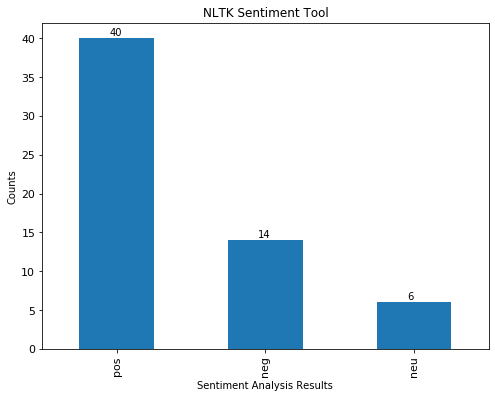

In [18]:
# NLTK sentiment
tweets.NLTK_sentiment.value_counts().plot(kind='bar', figsize=(8,6), fontsize=11);
plt.title('NLTK Sentiment Tool', size=12)
plt.xlabel('Sentiment Analysis Results')
plt.ylabel('Counts')
# add annotation on each bar
for i in range(3):
    plt.text(x = i - 0.05 , y = tweets.NLTK_sentiment.value_counts().values[i] + 0.4, 
             s = tweets.NLTK_sentiment.value_counts().values[i])
plt.show()

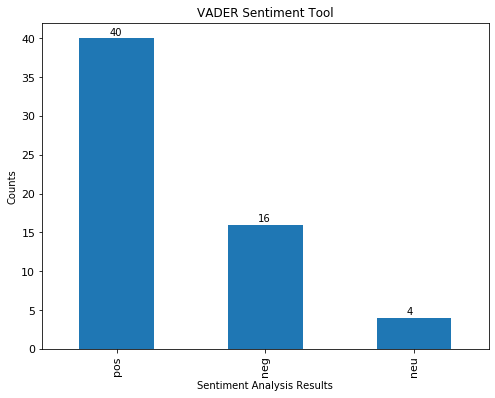

In [19]:
# VADER sentiment
tweets.VADER_sentiment.value_counts().plot(kind='bar', figsize=(8,6), fontsize=11);
plt.title('VADER Sentiment Tool', size=12)
plt.xlabel('Sentiment Analysis Results')
plt.ylabel('Counts')
# add annotation on each bar
for i in range(3):
    plt.text(x = i - 0.05 , y = tweets.VADER_sentiment.value_counts().values[i] + 0.4, 
             s = tweets.VADER_sentiment.value_counts().values[i])
plt.show()

### WordCloud

#### # Preparation

In [20]:
from matplotlib.pyplot import imshow
import numpy as np
from skimage import io, color

cloud_mask_color = io.imread('tweet_mask.png')
cloud_mask_grey = color.rgb2grey(cloud_mask_color)
cloud_mask_grey.shape

(202, 249)

In [21]:
def transform_mask(val, array_value=1):
    if val.all() == array_value:
        return 255 # setting the color to white
    else:
        return val

In [22]:
# Transform your mask into a new array with the same dimension to work with the function:
transformed_cloud_mask = np.ndarray((cloud_mask_grey.shape[0],cloud_mask_grey.shape[1]), np.int32)
transformed_cloud_mask.shape

(202, 249)

In [23]:
for i in range(len(cloud_mask_grey)):
    transformed_cloud_mask[i] = list(map(transform_mask, cloud_mask_grey[i]))

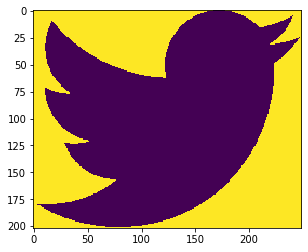

In [24]:
imshow(transformed_cloud_mask);

#### # word clouds

In [25]:
NLTK_neg = tweets[tweets.NLTK_sentiment=='neg']
NLTK_neu = tweets[tweets.NLTK_sentiment=='neu']
NLTK_pos = tweets[tweets.NLTK_sentiment=='pos']
VADER_neg = tweets[tweets.VADER_sentiment=='neg']
VADER_neu = tweets[tweets.VADER_sentiment=='neu']
VADER_pos = tweets[tweets.VADER_sentiment=='pos']
Public_neg = tweets[tweets.Sentiment=='neg']
Public_neu = tweets[tweets.Sentiment=='neu']
Public_pos = tweets[tweets.Sentiment=='pos']

In [26]:
def my_wordcloud(df, title, stopword=[]):
    """
    Expect: @param-df:a pandas dataframe with a column, Tweets
            @param-title: wordcloud title
            @param-stopword: a list of stopword
    Modifies: show a word cloud and save it as png
    Return: no value return
    """
    from matplotlib.pyplot import imshow
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # Create stopword list:
    stopwords = set(STOPWORDS)
    stopwords.update(['robot', 'ai', 'artificial', 'intelligence','artificial intelligence',
                      'artificialintelligence', 'artificialIntelligence','ArtificialIntelligence'
                     ] + stopword)
    #convert list to string and generate
    unique_string=(" ").join(df.Tweets)
    text=unique_string.lower().strip()

    # use parameters to adjust your word cloud, such as 
    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(font_path = 'arial', max_font_size=120, max_words=100, mask=transformed_cloud_mask,
                      stopwords=stopwords, background_color="white",
                      contour_width=2, contour_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()
    wordcloud.to_file(title+".png")

In [27]:
def words_table(df, title, stopword=[]):
    """
    Expect: @param-df:a pandas dataframe with a column, Tweets
            @param-title: a string of table title
    Modifies: convert sparse matrix to summary table of taken counts; a 'words_tb' dataframe will be created
    Return: a filtered pandas dataframe
    """
    
    import pandas as pd
    from wordcloud import STOPWORDS
    from sklearn.feature_extraction.text import CountVectorizer
    vect = CountVectorizer()
    # learn the 'vocabulary' of the training data (occurs in-place)
    vect.fit(df.Tweets)
    # transform training data into a 'document-term matrix'
    tweets_dtm = vect.transform(df.Tweets)
    tweets_dtm
    # convert sparse matrix to a dense matrix
    dtm_array = tweets_dtm.toarray()
    # store the vocabulary of X_train
    tokens = vect.get_feature_names()
    # summarize the counts
    series = pd.DataFrame(dtm_array, columns=tokens).sum()
    words_tb = pd.DataFrame(series, columns=['Counts'], index=tokens).sort_values(['Counts'],ascending=False)
    print('{}:'.format(title))
    
    # Create stopword list:
    stopwords = set(STOPWORDS)
    stopwords.update(['robot', 'ai', 'artificial', 'intelligence','artificial intelligence',
                      'artificialintelligence', 'artificialIntelligence','ArtificialIntelligence'
                     ] + stopword)
    my_list = [w for w in stopwords]
    
    # filter the stop words 
    Filter_df  = words_tb[~words_tb.index.isin(my_list)]
    return Filter_df

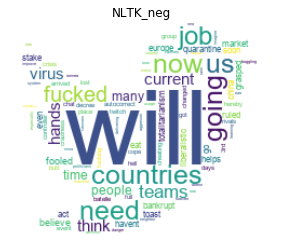

In [28]:
my_wordcloud(NLTK_neg, title = 'NLTK_neg')

In [29]:
words_table(NLTK_neg, 'NLTK_neg').head(10)

NLTK_neg:


,Counts
will,6
need,3
us,3
now,3
countries,3
going,3
hands,2
teams,2
current,2
fucked,2


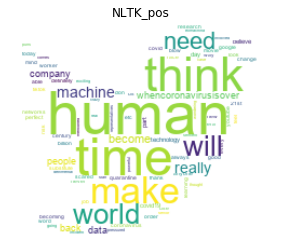

In [30]:
my_wordcloud(NLTK_pos, title = 'NLTK_pos')

In [31]:
words_table(NLTK_pos, 'NLTK_pos').head(10)

NLTK_pos:


,Counts
human,7
think,6
world,6
will,6
time,5
make,5
really,4
machine,4
people,3
need,3


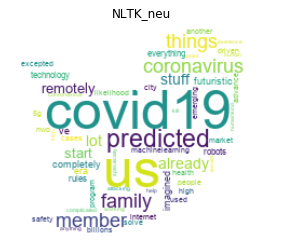

In [32]:
my_wordcloud(NLTK_neu, title = 'NLTK_neu')

In [33]:
words_table(NLTK_neu, 'NLTK_neu').head(10)

NLTK_neu:


,Counts
coronavirus,2
member,2
things,2
predicted,2
covid19,2
us,2
family,2
program,1
remotely,1
robots,1


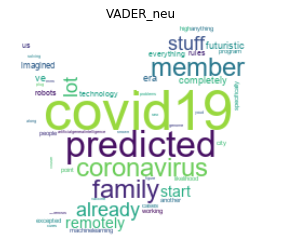

In [34]:
my_wordcloud(VADER_neu, title = 'VADER_neu')

In [35]:
words_table(VADER_neu, 'VADER_neu').head(10)

VADER_neu:


,Counts
member,2
predicted,2
covid19,2
family,2
coronavirus,2
point,1
working,1
problems,1
program,1
remotely,1


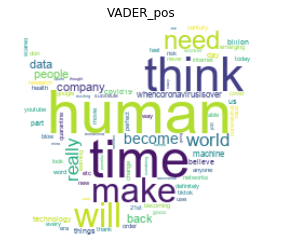

In [36]:
my_wordcloud(VADER_pos, title = 'VADER_pos')

In [37]:
words_table(VADER_pos, 'VADER_pos').head(10)

VADER_pos:


,Counts
human,7
will,6
think,6
make,5
time,5
really,4
world,4
things,3
day,3
data,3


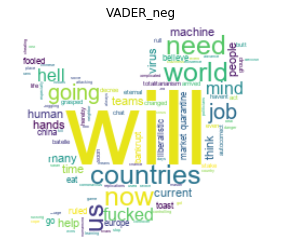

In [38]:
my_wordcloud(VADER_neg, title = 'VADER_neg')

In [39]:
words_table(VADER_neg, 'VADER_neg').head(10)

VADER_neg:


,Counts
will,6
countries,3
going,3
us,3
now,3
need,3
world,3
teams,2
hands,2
jobs,2


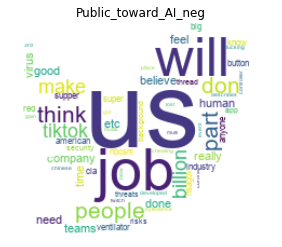

In [40]:
my_wordcloud(Public_neg, title = 'Public_toward_AI_neg')

In [41]:
words_table(Public_neg, 'Public_toward_AI_neg').head(10)

Public_toward_AI_neg:


,Counts
will,4
us,4
people,3
don,3
part,3
think,3
teams,2
company,2
virus,2
feel,2


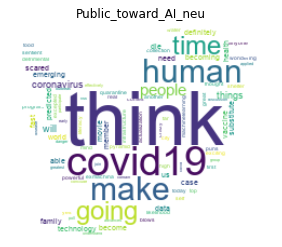

In [42]:
my_wordcloud(Public_neu, title = 'Public_toward_AI_neu')

In [43]:
words_table(Public_neu, 'Public_toward_AI_neu').head(10)

Public_toward_AI_neu:


,Counts
think,4
covid19,4
make,3
people,3
things,3
coronavirus,3
going,3
will,3
time,3
human,3


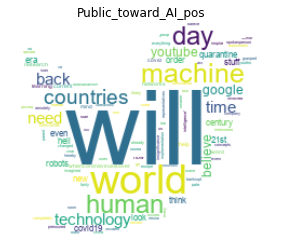

In [44]:
my_wordcloud(Public_pos, title = 'Public_toward_AI_pos')

In [45]:
words_table(Public_pos, 'Public_toward_AI_pos' ).head(10)

Public_toward_AI_pos:


,Counts
will,5
world,5
machine,4
human,3
technology,3
day,3
countries,3
need,3
back,3
covid19,2


In [46]:
tweets

,Sentiment,Tweets,NLTK_score,NLTK_sentiment,VADER_score,VADER_sentiment,match
Item,,,,,,,
1,neu,"in case anyone was wondering how quarantine is going, here’s a real thought i had today: “i’m not scared of artificial intelligence; i’m scared of my puns becoming sentient”",0.7853,pos,0.3830,pos,1.0
2,neu,#ExMachina this movie blows my mind artificial intelligence can be exciting but at the same time detrimental when it comes to how powerful they can become. This movie definitely makes you think about what if. Crazy,0.8074,pos,0.8074,pos,1.0
3,pos,"""representatives from Youtube mentioned that artificial Intelligence was involved in the incident and that they have pressured senior staff. A spokesperson from Google, Youtube’s parent company,",0.2960,pos,0.2960,pos,1.0
4,pos,Don't be fooled to believe quarantine helps. Countries will go bankrupt and then China will eat Europe like a toast. All fucked countries will be ruled by market liberalistic totalitarianism and artificial intelligence. You havent even grasped what's at stake. Act soon.,-0.5132,neg,-0.5132,neg,1.0
5,pos,"Since were already doing a lot of stuff remotely, what if #COVID19 is the start of the completely futuristic era we’ve all imagined of where technology rules and artificial intelligence/robots do everything for us.",0.0000,neu,0.0000,neu,1.0
6,neu,"#ArtificialIntelligence #MachineLearning AI just predicted that the more people you have in a city the more Coronavirus cases are excepted! The AI program also predicted that when a family member has Coronavirus, the likelihood for another family member to have it is high.",0.0000,neu,0.0000,neu,1.0
7,neu,"""Think of Artificial Intelligence as the top of a pyramid of needs. Yes, self-actualization (AI) is great, but you first need food, water, and shelter (data literacy, collection, and infrastructure).""",0.7050,pos,0.7050,pos,1.0
8,pos,"If AI becomes smarter than humans in the 21st century (which is fairly likely), than I think, when we look back (if we get to look back), we'll summarize the 21st century with just two words: 'artificial intelligence', as every other event would pale into insignificance.",0.4588,pos,0.7269,pos,1.0
9,pos,"Autocorrect just changed ""Batelle"" to ""Butt hell"" in a group chat and I hereby decree that full artificial intelligence has arrived.",-0.3612,neg,-0.3612,neg,1.0
